## Modelos de Regressão ##
#### Regressão Polinomial ####

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Seguindo a lógica utilizada no notebook de regressão linear, vamos definir a variável n para o tamanho do conjunto de dados
n = 100

# x será a uma variável independente 
x = 6 * np.random.rand(n, 1) - 3

# Aqui determinamos nossa variável dependente (target) como uma função quadrática de x
y = 0.5 * x ** 2 + x + 2 + 6 * np.random.randn(n, 1)

# Basicamente (0.5 * x²) + 2x + 6

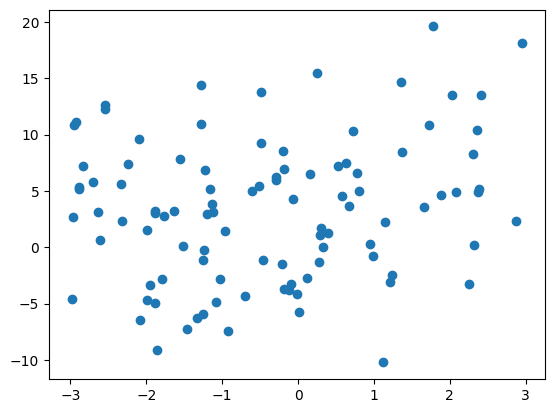

In [3]:
plt.scatter(x, y)

Como todos já devem saber, funções quadráticas descrevem uma parábola quando representadas em um gráfico.

No gráfico acima, é possível - e com certa dificuldade ainda - observar que o formato da imagem começa a definir uma parábola com cavidade para cima, como é característico de funções cujo theta_2, ou "termo quadrático", é positivo.

Na função descrita no exemplo:
- a ou theta_2 = 0.5
- b ou theta_1 = 2
- c ou theta_0 = 6

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Como de costume, fazemos a instanciação do modelo.
poly_features = PolynomialFeatures(degree = 2, include_bias=False)

Conforme pode ser observado nos argumentos da classe instanciada acima, degree representa o "grau" da função observada, no caso, é uma função do 2º grau.

In [5]:
# Aqui incluimos uma nova coluna na nossa matriz "x", nessa nova coluna está o valor inicial de x ao quadrado.
x_poly = poly_features.fit_transform(x)

x_poly

array([[ 2.86945592e+00,  8.23377730e+00],
       [-1.46371923e+00,  2.14247399e+00],
       [ 1.66457886e+00,  2.77082279e+00],
       [ 1.77612722e+00,  3.15462791e+00],
       [ 1.37353142e+00,  1.88658857e+00],
       [ 6.71765350e-01,  4.51268685e-01],
       [ 2.37187410e+00,  5.62578677e+00],
       [ 1.57186354e-01,  2.47075498e-02],
       [ 1.15145594e+00,  1.32585079e+00],
       [-2.24305747e+00,  5.03130683e+00],
       [ 2.40409611e+00,  5.77967811e+00],
       [-2.54977136e+00,  6.50133400e+00],
       [-1.13295405e+00,  1.28358487e+00],
       [ 2.08116495e+00,  4.33124755e+00],
       [-1.20249791e+00,  1.44600122e+00],
       [-2.92518596e-01,  8.55671288e-02],
       [-1.63064227e+00,  2.65899420e+00],
       [-1.50931947e+00,  2.27804527e+00],
       [-2.09026381e+00,  4.36920280e+00],
       [ 2.35158093e+00,  5.52993288e+00],
       [-1.22024288e+00,  1.48899267e+00],
       [ 6.90662116e-03,  4.77014158e-05],
       [-1.24713413e+00,  1.55534354e+00],
       [ 1.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# Aqui podemos observar que o modelo nos permite identificar facilmente as variáveis intercepto (theta_0) e os coeficientes (no caso theta_1 e theta_2)

print('Intercepto:',lin_reg.intercept_)
print('Coeficientes:',lin_reg.coef_)

Intercepto: [1.85184149]
Coeficientes: [[0.9923615  0.67856553]]


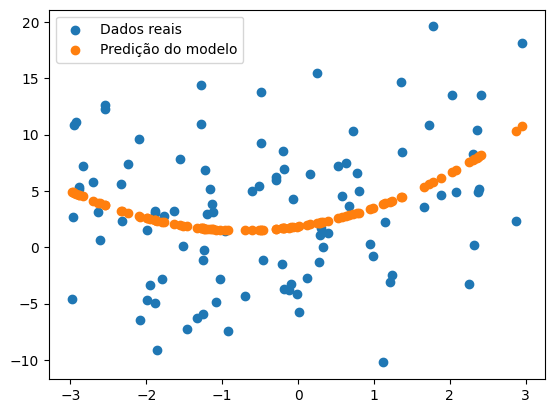

In [9]:
# Demonstração da predição realizada pelo modelo:
plt.scatter(x, y, label="Dados reais")
plt.scatter(x, lin_reg.predict(x_poly), label="Predição do modelo")
plt.legend()
plt.show()

### Balanço Viés-Variância ###

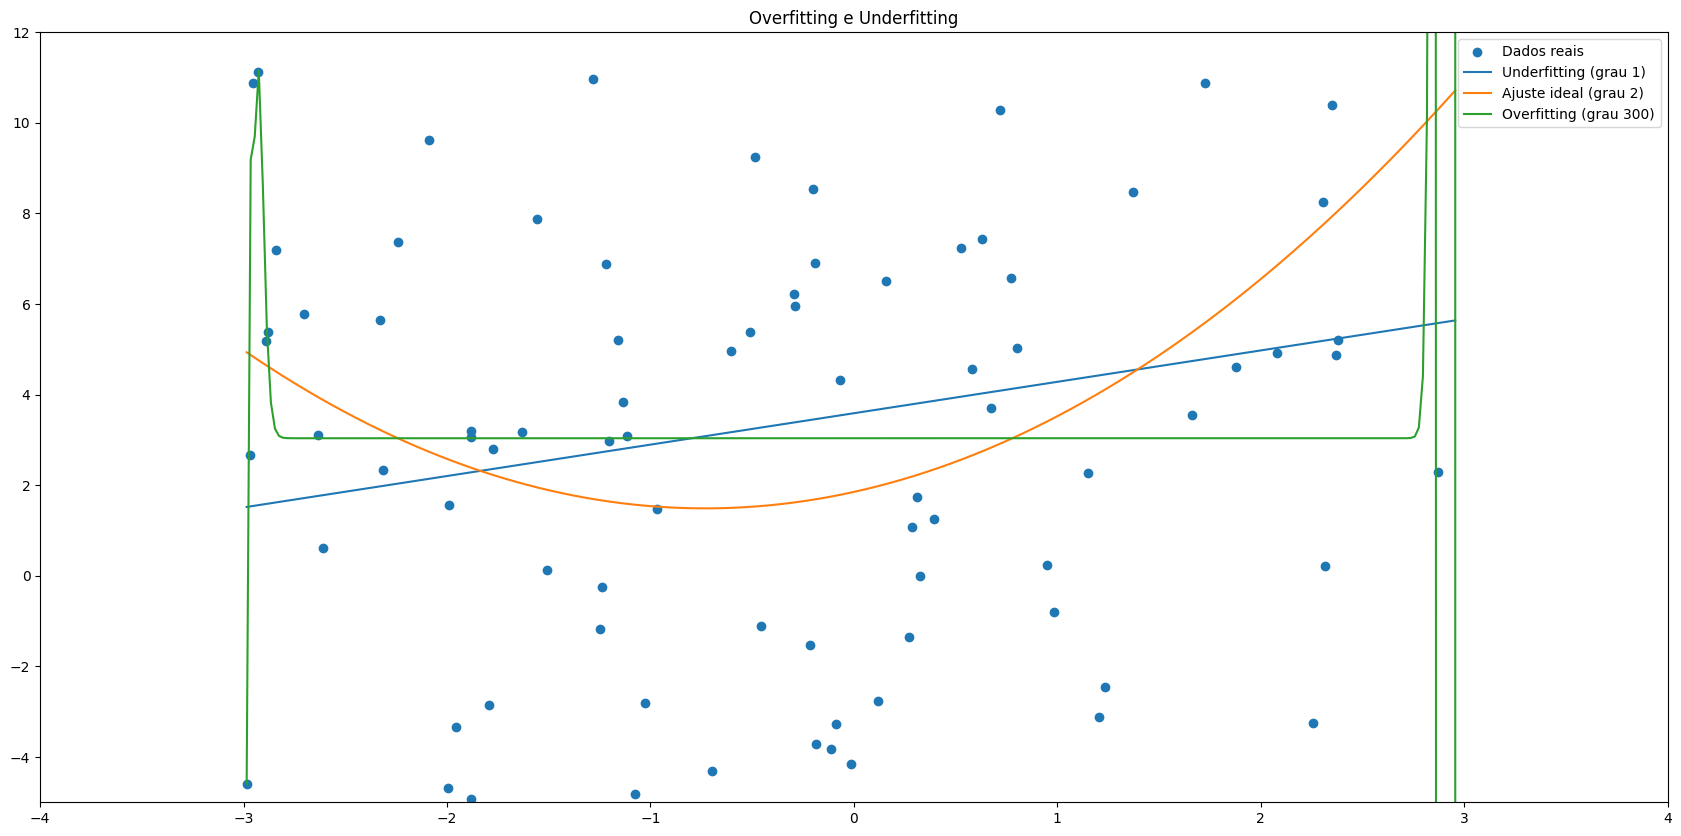

In [10]:
# No gráfico abaixo, duas das três linhas exemplificam perfeitamente os casos de Overfitting, Underfitting
fig, ax = plt.subplots(figsize=(21, 10))
plt.scatter(x, y, label="Dados reais")

# Dicionário com rótulos personalizados
legendas = {
    1: "Underfitting (grau 1)",
    2: "Ajuste ideal (grau 2)",
    300: "Overfitting (grau 300)"
}

for degree in [1, 2, 300]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)

    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)

    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, lin_reg.predict(x_seq_transf), label=legendas[degree])
    plt.title('Overfitting e Underfitting')

ax.set_ylim([-5, 12])
ax.set_xlim([-4, 4])
plt.legend()
plt.show()


**Overfitting e Underfitting**

- Underfitting: Ocorre quando o modelo é muito simples para capturar os padrões dos dados, geralmente por considerar poucos parâmetros ou uma estrutura limitada. Isso faz com que ele não generalize bem, resultando em previsões imprecisas e desempenho fraco tanto nos dados de treino quanto nos de teste.

- Overfitting: Ocorre quando o modelo é excessivamente complexo, ajustando-se demais aos ruídos e detalhes específicos dos dados de treino. Com isso, ele perde a capacidade de generalização e tende a errar ao lidar com dados novos, pois considera características irrelevantes como determinantes.

**Viés e Variância**

- Viés: Refere-se ao erro introduzido pelo modelo ao fazer suposições simplificadas sobre os dados. Modelos com viés alto tendem a subestimar padrões importantes, ignorando complexidades da distribuição real. Isso resulta em previsões sistematicamente distantes dos valores corretos — típico de situações de underfitting.

- Variância: Representa a sensibilidade do modelo às variações nos dados de treino. Um modelo com variância alta se ajusta tão fortemente aos dados de entrada que perde a capacidade de generalização, mostrando desempenho instável em novos conjuntos de dados. É o cenário clássico de overfitting, onde até ruídos se tornam "regras".


### Ridge Regression ###
Atribuindo penalizações para modelos de regressão

In [12]:
from sklearn.linear_model import Ridge

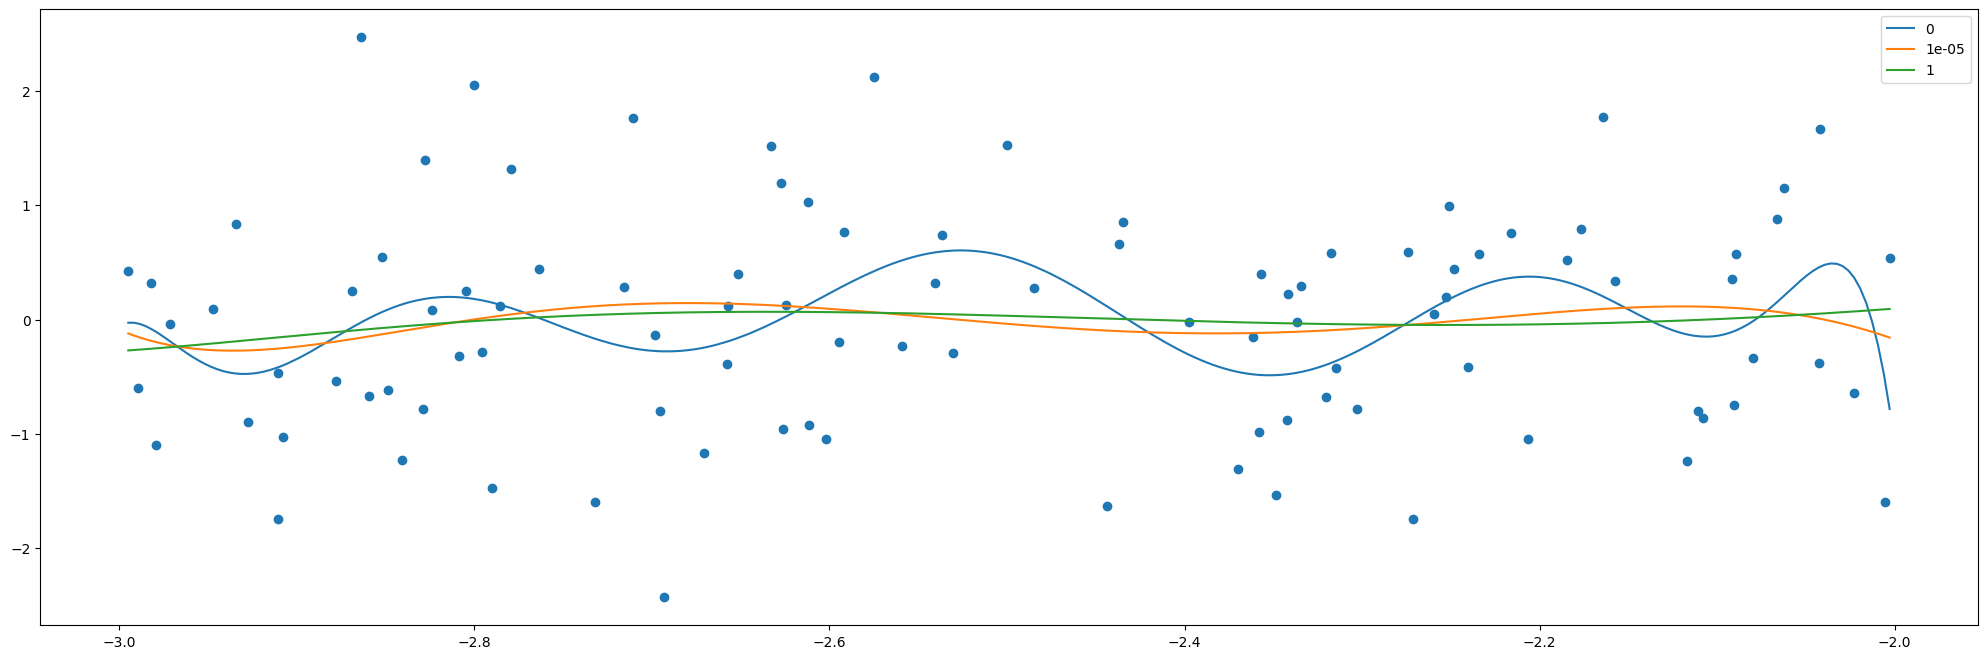

In [22]:
x = np.random.rand(n ,1) - 3
y = np.random.randn(n, 1)

fig, ax = plt.subplots(figsize = (25, 8))
plt.scatter(x, y)

for alpha in [0, 1e-5, 1]:
    poly_features = PolynomialFeatures(degree=10, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)

    ridge_reg = Ridge(alpha = alpha, solver="cholesky")
    ridge_reg.fit(x_poly, y)

    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, ridge_reg.predict(x_seq_transf), label = alpha)
plt.legend()
plt.show()


No gráfico acima, é possível observar o efeito da **penalização (regularização)** nas curvas de predição, conforme aumentamos o valor de `alpha` (custo).

- **Linha azul** (`alpha = 0`): sem penalização, o modelo se ajusta livremente aos dados. Como resultado, temos uma curva excessivamente flexível e sinuosa — típica de overfitting.

- **Linha vermelha** (`alpha = 0.00001`): com penalização mínima, o efeito corretivo é sutil. Ainda assim, nota-se que a linha está levemente mais suave e menos instável que a azul.

- **Linha verde** (`alpha = 1`): com penalização mais forte, o modelo reduz a complexidade da curva. A linha se torna mais suave e generaliza melhor o padrão dos dados, evitando sobreajustes.
